# South African Accident Data Scraper Demo

This notebook demonstrates how to use the Improved Accident Scraper to collect and analyze accident data from various South African sources.


## Setup

First, let's import the required libraries and set up our environment.


In [23]:
# Import required libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Add the parent directory to the path so we can import the project modules
sys.path.append('..')

# Import the main module
from main import run_scraper, discover_scrapers, merge_csv_files


## Install Requirements

If you haven't installed the required packages yet, uncomment and run the cell below.


In [24]:
# import subprocess
# subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "../requirements.txt"])
# print("Requirements installed successfully.")


## Discover Available Scrapers

Let's find out which scrapers are available in the project.


In [25]:
print("South African Accident Data Scraper Demo")
print("========================================")

print("\nDiscovering available scrapers...")
scraper_classes = discover_scrapers()
print(f"Available scrapers: {', '.join(scraper_classes.keys())}")


South African Accident Data Scraper Demo

Discovering available scrapers...
Available scrapers: arrivealive, statssa, dot, rtmc


## Create Output Directory

Create a directory to store the output files.


In [26]:
notebook_output_dir = os.path.abspath(os.path.join('..', 'notebook_output'))
os.makedirs(notebook_output_dir, exist_ok=True)
print(f"Output directory created: {notebook_output_dir}")


Output directory created: C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\notebook_output


## Run the RTMC Scraper

Let's run the RTMC scraper as an example. We'll add a check to skip downloading PDFs if the corresponding .txt files already exist.


In [27]:
print("\nRunning RTMC scraper...")
rtmc_scraper_class = scraper_classes.get('rtmc')

if rtmc_scraper_class:
    # Create an instance of the scraper
    rtmc_scraper = rtmc_scraper_class()

    # Check if .txt files already exist in the pdf_downloads directory
    pdf_dir = rtmc_scraper.pdf_dir
    existing_txt_files = [f for f in os.listdir(pdf_dir) if f.endswith('_ocr.txt')]

    if existing_txt_files:
        print(f"Found {len(existing_txt_files)} existing .txt files in {pdf_dir}")
        print("Skipping PDF downloads and using existing .txt files...")

        # Create a list of PDF paths from the existing .txt files
        pdf_paths = []
        for txt_file in existing_txt_files:
            # Convert txt filename back to pdf filename (remove _ocr.txt and add .pdf)
            pdf_filename = txt_file.replace('_ocr.txt', '.pdf')
            pdf_path = os.path.join(pdf_dir, pdf_filename)
            if os.path.exists(pdf_path):
                pdf_paths.append(pdf_path)

        if pdf_paths:
            print(f"Using {len(pdf_paths)} existing PDF files with corresponding .txt files")
            # Set the downloaded_pdfs directly to skip the download step
            rtmc_scraper.downloaded_pdfs = pdf_paths
            rtmc_scraper.raw_data = pdf_paths

            # Run the parse_data method directly
            rtmc_scraper.parse_data()

            # Export to CSV
            csv_path = rtmc_scraper.export_to_csv(output_dir=notebook_output_dir)
            print(f"Data exported to {csv_path}")
        else:
            print("No matching PDF files found for the existing .txt files")
            print("Running the scraper normally...")
            csv_path = run_scraper(rtmc_scraper, notebook_output_dir)
            print(f"Data exported to {csv_path}")
    else:
        print("No existing .txt files found in pdf_downloads directory")
        print("Running the scraper normally...")
        # Run the scraper
        csv_path = run_scraper(rtmc_scraper, notebook_output_dir)
        print(f"Data exported to {csv_path}")
else:
    print("RTMC scraper not found")



Running RTMC scraper...
Found 42 existing .txt files in C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\pdf_downloads
Skipping PDF downloads and using existing .txt files...
Using 42 existing PDF files with corresponding .txt files
[RTMC] Parsing 42 PDF files
[RTMC] Starting to process 42 PDF files
[RTMC] PDF Processing Progress: |░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░| 0% (0/42 files)
[RTMC] Processing PDF 1/42: 1st%20quarter%20201516Report.pdf
[RTMC] Error extracting tables from C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\pdf_downloads\1st%20quarter%20201516Report.pdf: `java` command is not found from this Python process.Please ensure Java is installed and PATH is set for `java`
[RTMC] Trying OCR as fallback for C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\pdf_downloads\1st%20quarter%20201516Report.pdf...
[RTMC] OCR text file already exists for C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\pdf_downloads\1st

## Load and Analyze the Data

Now let's load the data from the CSV file and perform some basic analysis.


In [31]:
if 'csv_path' in locals() and os.path.exists(csv_path):
    print("\nLoading and analyzing the data...")
    df = pd.read_csv(csv_path)

    # Display the first few rows
    print("\nFirst few rows of the data:")
    display(df.head())

    # Display summary statistics
    print("\nSummary statistics:")
    display(df.describe())

    # Count records by region
    print("\nRecords by region:")
    display(df['Region'].value_counts())

    # Count records by source
    print("\nRecords by source:")
    display(df['Source'].value_counts())
else:
    print("No data available for analysis. Please run the scraper first.")



Loading and analyzing the data...

First few rows of the data:


,Region,AccidentCount,Year,RunningTotal,Source
0,Eastern Cape,10,2020,1633,RTMC
1,Free State,8,2020,1899,RTMC
2,Gauteng,15,2020,4523348,RTMC
3,KwaZulu-Natal,13,2020,3276749,RTMC
4,Limpopo,5,2020,2058,RTMC



Summary statistics:


,AccidentCount,Year,RunningTotal
count,1.980000e+02,198.000000,1.980000e+02
mean,6.610071e+04,2020.000000,9.240286e+05
std,4.161370e+05,2.399238,1.914789e+06
min,1.000000e+00,2016.000000,2.000000e+00
25%,6.000000e+00,2018.000000,1.317500e+03
50%,2.000000e+01,2020.000000,2.061000e+03
75%,5.980000e+02,2021.000000,5.711000e+03
max,4.523121e+06,2025.000000,6.645711e+06



Records by region:


Region
Eastern Cape     23
Gauteng          23
Mpumalanga       23
Western Cape     23
Limpopo          22
North West       22
KwaZulu-Natal    21
Northern Cape    21
Free State       20
Name: count, dtype: int64


Records by source:


Source
RTMC    198
Name: count, dtype: int64

## Visualize the Data

visualizations to better understand the data, helps as a sanity check with the scraper values. Currently scrapes almost all numerical data from the pdf files (for convenience the .txt files are uploaded in the "pdf_downloads" folder for use during development.)



Creating visualizations...
Visualization saved to C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\notebook_output\accident_by_region.png


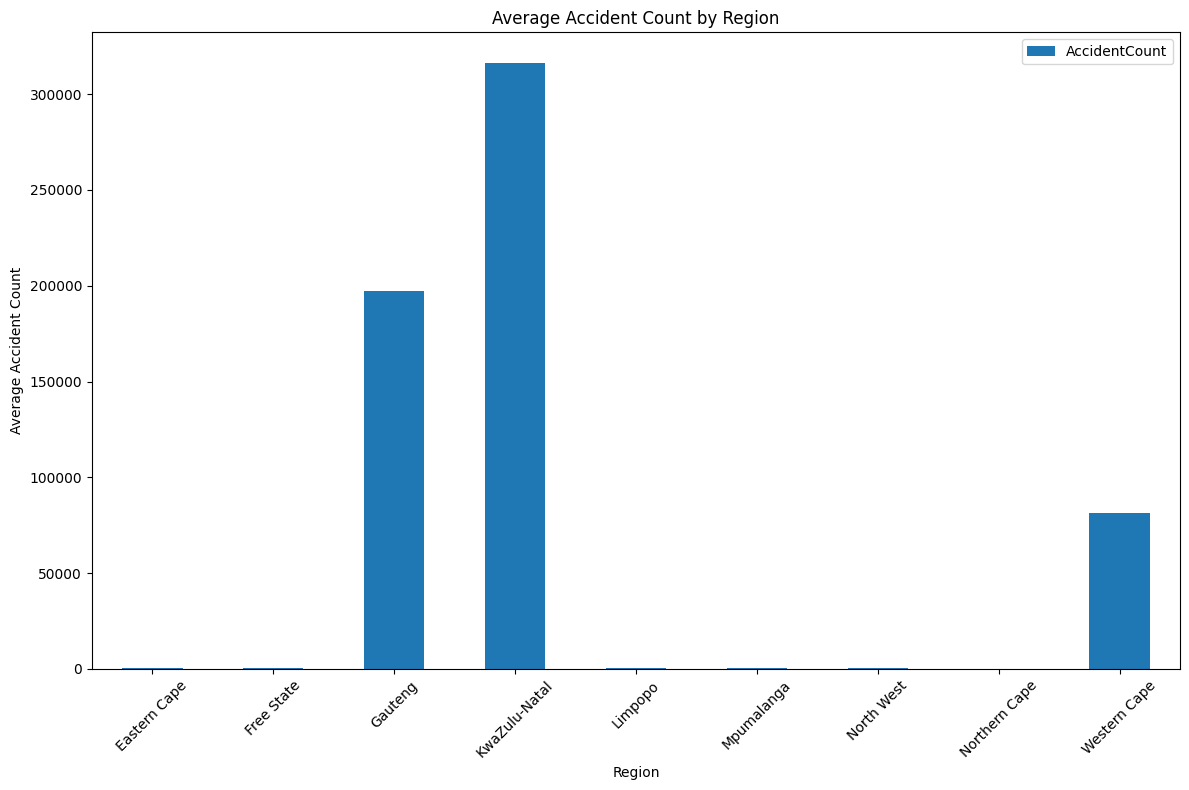

Visualization saved to C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\notebook_output\total_accidents_by_source.png


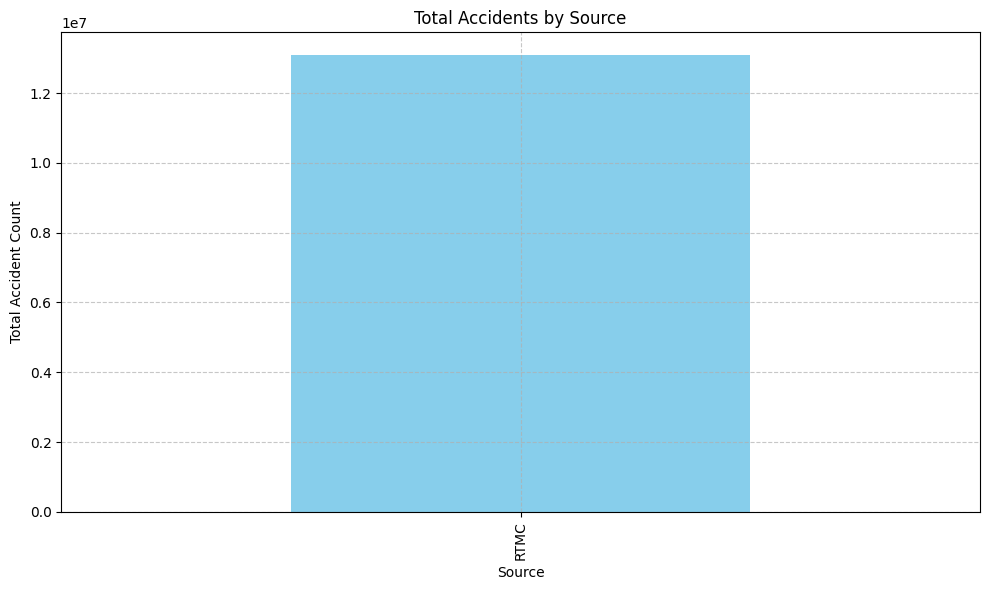

Visualization saved to C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\notebook_output\total_accidents_by_year.png


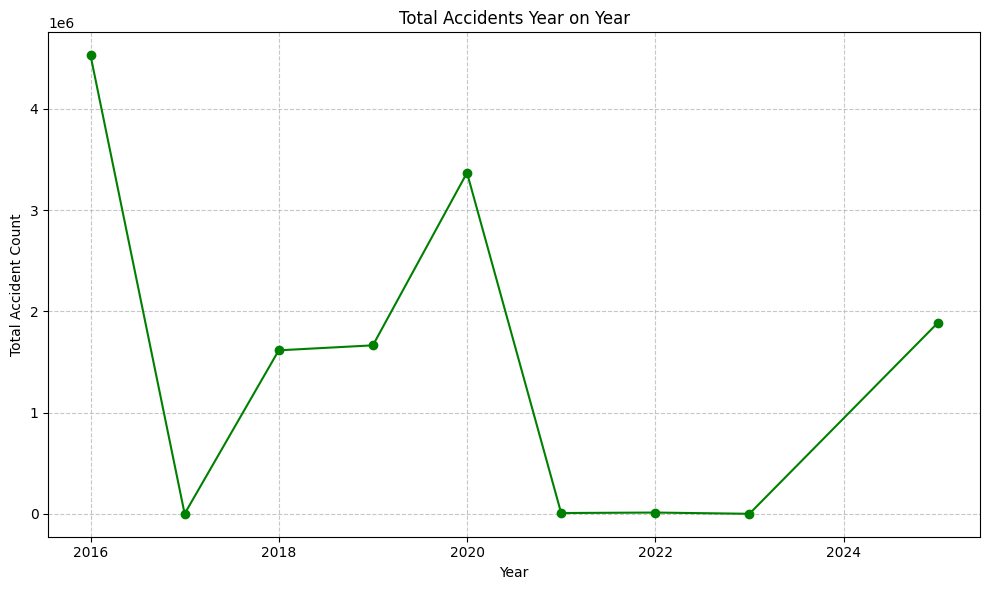

In [32]:
if 'df' in locals() and not df.empty:
    print("\nCreating visualizations...")

    # Group by Region only and calculate the mean accident count
    region_accidents = df.groupby(['Region'])['AccidentCount'].mean().reset_index()

    # Plot the data
    plt.figure(figsize=(12, 8))
    region_accidents.plot(kind='bar', x='Region', y='AccidentCount', ax=plt.gca())
    plt.title('Average Accident Count by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Accident Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(notebook_output_dir, 'accident_by_region.png'))
    print(f"Visualization saved to {os.path.join(notebook_output_dir, 'accident_by_region.png')}")
    plt.show()

    # Plot total accidents by source
    plt.figure(figsize=(10, 6))
    source_totals = df.groupby('Source')['AccidentCount'].sum()
    source_totals.plot(kind='bar', color='skyblue')
    plt.title('Total Accidents by Source')
    plt.xlabel('Source')
    plt.ylabel('Total Accident Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(notebook_output_dir, 'total_accidents_by_source.png'))
    print(f"Visualization saved to {os.path.join(notebook_output_dir, 'total_accidents_by_source.png')}")
    plt.show()

    # Plot total accidents by year (line graph)
    plt.figure(figsize=(10, 6))
    yearly_totals = df.groupby('Year')['AccidentCount'].sum()
    yearly_totals.plot(kind='line', marker='o', color='green')
    plt.title('Total Accidents Year on Year')
    plt.xlabel('Year')
    plt.ylabel('Total Accident Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(notebook_output_dir, 'total_accidents_by_year.png'))
    print(f"Visualization saved to {os.path.join(notebook_output_dir, 'total_accidents_by_year.png')}")
    plt.show()
else:
    print("No data available for visualization. Please run the scraper first.")


## Run Multiple Scrapers and Merge Results

Most Scrapers are still generating random data, the only one scraping values is RTMC_Scraper -- DO NOT TRUST BELOW



In [30]:
print("\nRunning multiple scrapers and merging results...")

# Create instances of all available scrapers
scrapers = [cls() for cls in scraper_classes.values()]

# Run each scraper and collect the CSV paths
csv_paths = []
for scraper in scrapers:
    try:
        print(f"Running {scraper.source_name} scraper...")
        csv_path = run_scraper(scraper, notebook_output_dir)
        csv_paths.append(csv_path)
    except Exception as e:
        print(f"Error running {scraper.source_name} scraper: {e}")

# Merge the CSV files
if csv_paths:
    merged_file = merge_csv_files(csv_paths, os.path.join(notebook_output_dir, "merged_accidents.csv"))
    print(f"Merged data exported to {merged_file}")
else:
    print("No data to merge")

print("\nDemo completed. Check the notebook_output directory for results.")



Running multiple scrapers and merging results...
Running ARRIVEALIVE scraper...
Running ARRIVEALIVE scraper...
Fetching data...
[ARRIVEALIVE] Successfully fetched data from: https://www.arrivealive.co.za/road-safety-statistics
[ARRIVEALIVE] Exact scraping location: https://www.arrivealive.co.za/road-safety-statistics
Parsing data...
[ARRIVEALIVE] Successfully parsed 15 records
Exporting to CSV...
Data exported to C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\notebook_output\accidents_south_africa_11.csv
Running STATSSA scraper...
Running STATSSA scraper...
Fetching data...
[STATSSA] Successfully fetched data from: http://www.statssa.gov.za/?page_id=1854&PPN=P0320
[STATSSA] Exact scraping location: http://www.statssa.gov.za/publications/P0320/P03202021.pdf
Parsing data...
[STATSSA] Successfully parsed 45 records
Exporting to CSV...
Data exported to C:\Users\GrahamHill\PycharmProjects\Improved_Accident_Scraper\notebook_output\accidents_south_africa_12.csv
Running DOT scr

## Conclusion

This notebook has demonstrated how to use the Improved Accident Scraper to collect and analyze accident data from various South African sources. You can modify this notebook to suit your specific needs or to explore the data in different ways.
